<h2> Procesamiento de imagenes</h2>
<h3> Computer Vision con Python - OpenCV</h3> 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
video_path = "videos/deteccion_tienda.mp4"

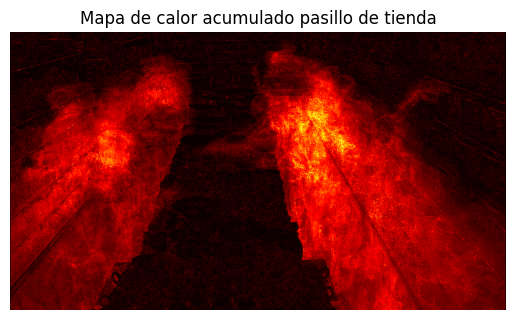

In [5]:
cap = cv2.VideoCapture(video_path)

# Sustractor de fondo.
bg_subtractor = cv2.createBackgroundSubtractorMOG2(
    history=500,        # Número de frames para el modelo de fondo
    varThreshold=16,    # Umbral de varianza para detectar el fondo
    detectShadows=True, # Detectar sombras
)

headmap_acumulado = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
# Inicializar acumulador de headmap si es None
    if headmap_acumulado is None:
        headmap_acumulado = np.zeros_like(frame.shape[:2], dtype=np.float32)
        
    # Aplicar el sustractor de fondo
    fgmask = bg_subtractor.apply(frame)
    
    #Acumular la máscara de primer plano
    headmap_acumulado = cv2.add(headmap_acumulado, fgmask.astype(np.float32))
    
#Mostrar el mapa de carlor.
plt.imshow(headmap_acumulado, cmap='hot')
plt.title('Mapa de calor acumulado pasillo de tienda')
plt.axis('off')
plt.show()

<p> La imagen presenta un mapa de calor acumulado de un pasillo de tienda, donde las áreas de mayor intensidad de color rojo y anaranjado brillante indican una alta concentración o tiempo de permanencia de clientes. Se pueden observar claramente dos zonas principales de alta actividad, representadas por concentraciones de calor intensas y prolongadas, sugiriendo puntos de interés o zonas de alto tráfico dentro del pasillo.</p> 

<h3> Heatmap normalizado</h3>

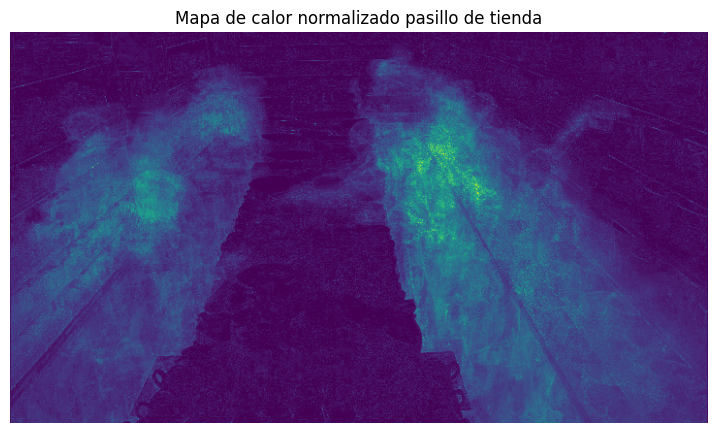

In [8]:
# Normalizar el mapa de calor
headmap_norm = cv2.normalize(headmap_acumulado, None, 0, 255, cv2.NORM_MINMAX)
headmap_norm = np.uint8(headmap_norm)

# Aplicar un mapa de color
colored_headmap = cv2.applyColorMap(headmap_norm, cv2.COLORMAP_VIRIDIS)

# Visualización del mapa de calor
plt.figure(figsize=(9, 7))
plt.imshow(cv2.cvtColor(colored_headmap, cv2.COLOR_BGR2RGB))
plt.title('Mapa de calor normalizado pasillo de tienda')
plt.axis('off')
plt.show()